**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [92]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os
import json
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [101]:
def eRrors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * eRrors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [94]:
x = np.arange(0, 100, 10)
y_er = line(0.65, x, errors=True)
y = line(0.65, x)
err = y_er - y

Text(0,0.5,'Dependent Variable')

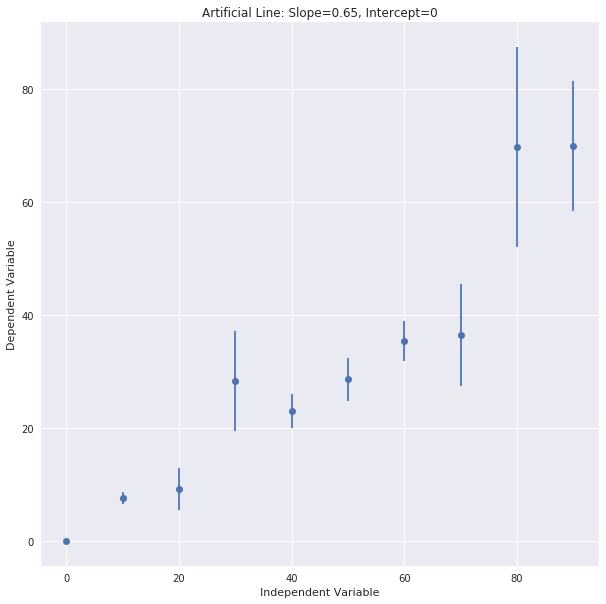

In [95]:
plt.figure(figsize=(10,10))
plt.errorbar(x, y_er, yerr=err, fmt='o' )
plt.title('Artificial Line: Slope=0.65, Intercept=0')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [96]:
x_con = sm.add_constant(x)
print('Y:', y_er)
print('x', x)
print('X add_constant()', x_con)

Y: [  0.           7.55755895   9.20948426  28.30930665  23.02308244
  28.66191888  35.42972228  36.43383477  69.74160394  70.0160353 ]
x [ 0 10 20 30 40 50 60 70 80 90]
X add_constant() [[  1.   0.]
 [  1.  10.]
 [  1.  20.]
 [  1.  30.]
 [  1.  40.]
 [  1.  50.]
 [  1.  60.]
 [  1.  70.]
 [  1.  80.]
 [  1.  90.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

### The wrong one:

In [97]:
lineX = sm.OLS(endog=x, exog=y_er).fit()
lineX.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     218.0
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.29e-07
Time:                        14:40:20   Log-Likelihood:                -37.826
No. Observations:                  10   AIC:                             77.65
Df Residuals:                       9   BIC:                             77.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.3671      0.093     14.765      0.000         1.158     1.577
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.350
Skew:                          -0.145   Prob(JB):                        0.839
Kurtosis:                       2.131   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The right one:

In [98]:
line = sm.OLS(endog=y_er, exog=x_con).fit()
line.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     65.34
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.05e-05
Time:                        14:40:20   Log-Likelihood:                -34.316
No. Observations:                  10   AIC:                             72.63
Df Residuals:                       8   BIC:                             73.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.6678      4.917     -0.543      0.602       -14.007     8.672
x1             0.7446      0.092      8.083      0.000         0.532     0.957
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.335
Skew:                           0.046   Prob(JB):                        0.846
Kurtosis:                       2.108   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discussion

First of all, only the right one's coef is close to the original slope. The wrong one's coef is way too off. Second, the R-squared of both models are similarity high, which is expected because the correlation of y and x is linear.

# 4. plot the data (as points) and both statsmodels fits

Text(0,0.5,'y')

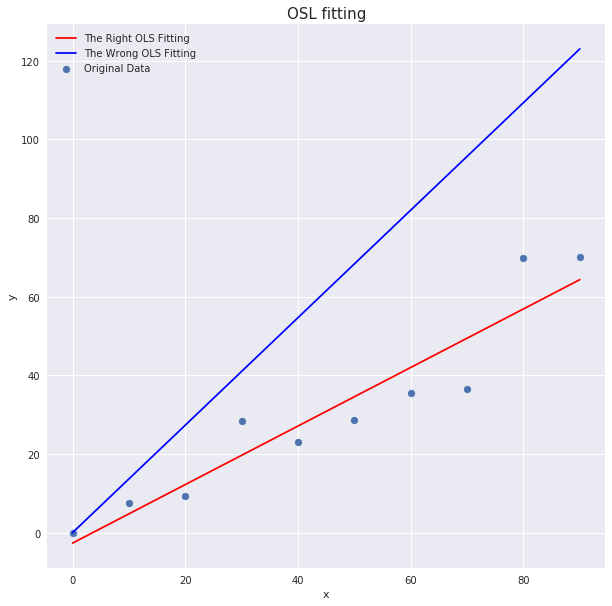

In [99]:
plt.figure(figsize=(10,10))
plt.scatter(x, y_er, label='Original Data' )
plt.plot(x, line.predict(), 'r', label='The Right OLS Fitting')
plt.plot(x, lineX.predict(x), 'b', label='The Wrong OLS Fitting')
plt.legend()
plt.title('OSL fitting', fontsize=15)
plt.xlabel('x')
plt.ylabel('y')

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [100]:
y100 = line(0.3, x, b=130)
y100_er = line(0.3, x, b=130, errors=True)
err100 = y100_er - y100

TypeError: 'RegressionResultsWrapper' object is not callable

Text(0,0.5,'Dependent Variable')

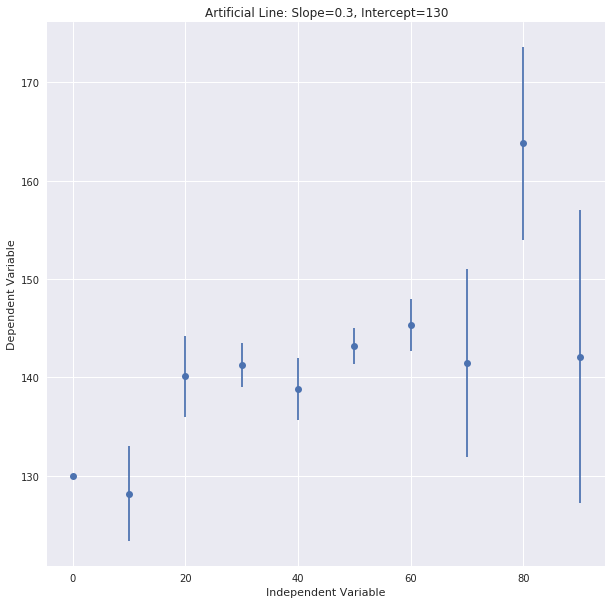

In [102]:
plt.figure(figsize=(10,10))
plt.errorbar(x, y100_er, yerr= err100, fmt='o')
plt.title('Artificial Line: Slope=0.3, Intercept=130')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# 6. repeat step 3

### The Wrong one

In [103]:
line100X = sm.OLS(x, sm.add_constant(y100_er)).fit()
line100X.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     8.982
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0172
Time:                        14:41:03   Log-Likelihood:                -44.003
No. Observations:                  10   AIC:                             92.01
Df Residuals:                       8   BIC:                             92.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -278.5046    108.170     -2.575      0.033      -527.945   -29.064
x1             2.2875      0.763      2.997      0.017         0.527     4.048
==============================================================================
Omnibus:                        3.343   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                1.508
Skew:                           0.950   Prob(JB):                        0.471
Kurtosis:                       2.930   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The Right One

In [104]:
line100 = sm.OLS(y100_er, x_con).fit()
line100.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     8.982
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0172
Time:                        14:41:04   Log-Likelihood:                -32.543
No. Observations:                  10   AIC:                             69.09
Df Residuals:                       8   BIC:                             69.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        131.0168      4.119     31.811      0.000       121.519   140.514
x1             0.2312      0.077      2.997      0.017         0.053     0.409
==============================================================================
Omnibus:                        3.289   Durbin-Watson:                   2.938
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                0.958
Skew:                           0.727   Prob(JB):                        0.619
Kurtosis:                       3.428   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discussion

First of all, only the right one's coef and constant term are very close to the original slope and intercept. The wrong one's coef and constant term are way too off. However, the p value in both modes are significant. Second, the R-squared of both models are similar, which is expected because the correlation of y and x is linear.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [115]:
W = 1 / np.std(y100_er) ** 2
line100wls = sm.WLS(y100_er, x_con, weights=W).fit()
line100wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            WLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     8.982
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0172
Time:                        14:49:49   Log-Likelihood:                -32.543
No. Observations:                  10   AIC:                             69.09
Df Residuals:                       8   BIC:                             69.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        131.0168      4.119     31.811      0.000       121.519   140.514
x1             0.2312      0.077      2.997      0.017         0.053     0.409
==============================================================================
Omnibus:                        3.289   Durbin-Watson:                   2.938
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                0.958
Skew:                           0.727   Prob(JB):                        0.619
Kurtosis:                       3.428   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

NameError: name 'smfitDoneRight' is not defined

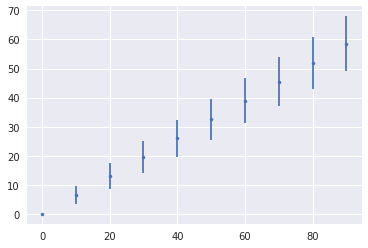

In [110]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
plt.errorbar(x, y, yerr=errors(x), fmt='.')
plt.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
plt.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.legend();